# Прогнозы и предсказания

## Описание проекта:

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.

Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. 

Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Наша задача — провести анализ и подготовить план действий по удержанию клиентов.

**А именно:**


- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;


- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;


- проанализировать основные признаки, наиболее сильно влияющие на отток;


- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:


1) выделить целевые группы клиентов;

2) предложить меры по снижению оттока;

3) определить другие особенности взаимодействия с клиентами.


**Описание данных:**

«Культурист-датасаентист» предоставил сведения в csv-файлах. Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:


- 'Churn' — факт оттока в текущем месяце;


- Текущие поля в датасете:
   
**Данные клиента за предыдущий до проверки факта оттока месяц:**


- 'gender' — пол;


- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;


- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);


- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);


- 'Phone' — наличие контактного телефона;


- 'Age' — возраст;


- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

**Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:**


- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);


- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);


- 'Group_visits' — факт посещения групповых занятий;


- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;


- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;


- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.


## Шаг 1. Изучение общей информации о датасете и предобработка данных

1) Импортируем необходимые для решения поставленных задач библиотеки

2) Импортируем датасет

3) Посмотрим на общую информацию о датасете и сам датасет, проведем необходимую предобработку данных

In [1]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [2]:
# прочитаем файл

gym_churn = pd.read_csv(' /datasets/gym_churn.csv')
    
# установим отображение количества столбцов на экране
pd.options.display.max_columns = 40

In [3]:
# Посмотрим на общую информацию о датасете и сам датасет
gym_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
gym_churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Отлично, пропусков в данных нет и проблем с типами данных тоже, однако стоит поработать с названиями столбцов:

In [5]:
#для удобства приведем все названия переменных к нижнему регистру
gym_churn.columns = gym_churn.columns.str.lower()

In [6]:
#проверим замену
gym_churn.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Проверим данные на наличие дубликатов:

In [7]:
gym_churn.duplicated().sum()

0

Дубликатов в строках не обнаружено. Приступаем к исследовательскому анализу данных.

## Шаг 2. Исследовательский анализ данных (EDA)

### Изучение отсутствующих признаков, средних значений и стандартных отклонений 

Посмотрим на описательные статистики с помощью меода describe()

In [8]:
gym_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


**Вывод на основе описательных статистик:**

- Распределение по полу приблизительно одинаковое


- Большинство пользователей (85%) живут или работают в районах, где находится фитнес-центр


- Почти половина пользователей являются сотрудниками компании-партнёра клуба


- Приблизительно 31% клиентов использовали промо-код от знакомого при оплате первого абонемента


- В 90% случаев известен контактный телефон клиента


- Средний возраст клиента - 29 лет


- Средние выручка от клиента на дополнительные услуги - 146 у.е. ( кафе, спорт-товары, косметический и массажный салон)


- Средний срок до окончания текущего действующего абонемента - 4.3 месяца


- Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев


- Средняя частота посещений в неделю за все время с начала действия абонемента - около 2 раз (1.88)


- Средняя частота посещений в неделю за предыдущий месяц - около 2 раз (1.77)


- Доля оттока - приблизительно 27%

### Средние значения в двух группах - те, кто ушли в отток и те, кто остались

In [9]:
churn_grouped = gym_churn.groupby('churn').mean().T
churn_grouped

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


**Вывод на основе средних значений в двух группах (попавших в отток и тех, кто остались):**

- Распределение по полу приблизительно одинаковое, что среди тех, кто ушел в отток, что среди оставшихся


- Доля клиентов,  живущих или работающих в районах, где находится фитнес-центр, ниже среди тех, кто попал в отток, что также логично, поскольку из-за дополнительных издержек человек может сделать выбор в пользу какого-нибудь другого варианта


- Среди попавших в отток доля людей, являющихся сотрудниками компании-партнёра клуба, существенно ниже


- Среди попавших в отток доля людей, использовавших промо-код от знакомого при оплате первого абонемента, существенно ниже (Вероятно, что люди могут посещать зал вместе, а таким образом меньше вероятность того, что они уйдут в отток)

- Наличие мобильного номера клиента не отличается в группах


- Длительность текущего действующего абонемента среди попавших в отток существенно ниже (1.7 месяца против 5.7). Это логично, так как человек в ближайшее время может понять, удобен ли ему по всем параментам  клуб. К тому же есть много акций на первый месяц занятий - люди воспользуются выгодой, но остаться в клубе не планируют

- У групп есть разница в среднем возрасте клиентов - попавшие в отток моложе


- Суммарная выручка от дополнительных услуг фитнес-центра ниже среди тех, кто попал в отток


- Срок до окончания текущего действующего абонемента существенно ниже среди тех, кто попал в отток, что логично, потому что обидно терять слишком много занятий, на которые были потрачены деньги


- Время с момента первого обращения в фитнес-центр (в месяцах) для действующей группы - 4.7 месяцев, а для группы оттока - 1.7.


- Средняя частота посещений в неделю за все время с начала действия абонемента для тех, кто попал в отток - 1.47 раз, а для тех, кто не попал - 2.02


- Средняя частота посещений в неделю за предыдущий месяц почти в два раза ниже у группы, попавшей в отток. На мой взгляд, наиболее важное наблюдение.

### Cтолбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

In [10]:
left = gym_churn[gym_churn['churn']==1]
stayed = gym_churn[gym_churn['churn']==0]

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


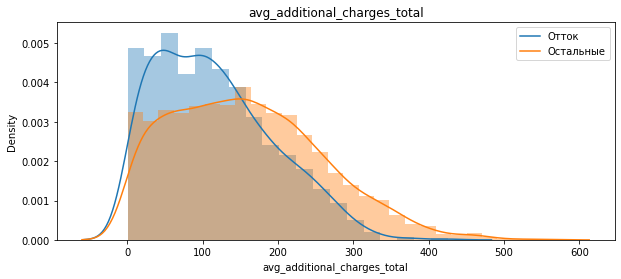

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


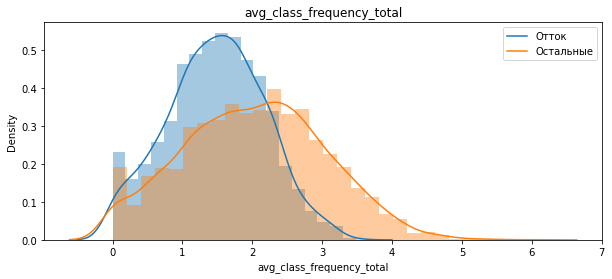

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


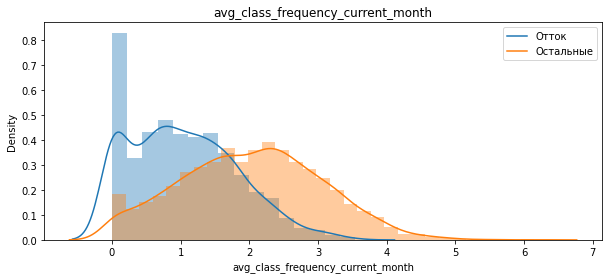

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


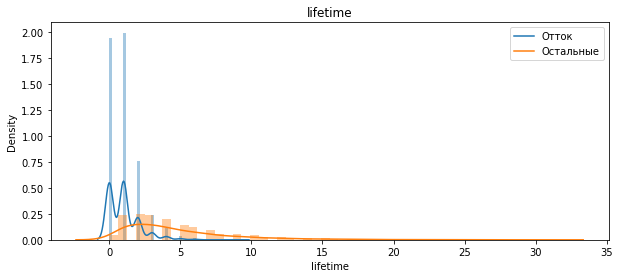

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


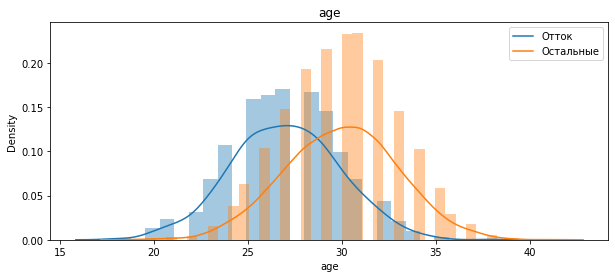

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


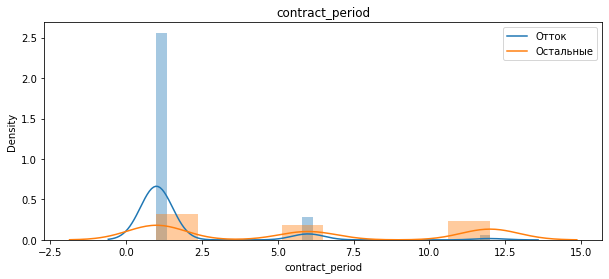

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


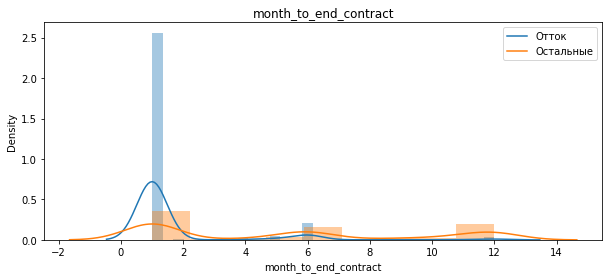

In [11]:
for column in ['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'lifetime', 'age', 'contract_period', 'month_to_end_contract']: 
  plt.figure(figsize=(10,4)) 
  plt.title(column)
  sns.distplot(left[column])
  sns.distplot(stayed[column])
  plt.legend(['Отток', 'Остальные'])
  plt.show()

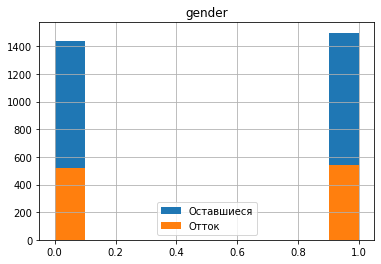

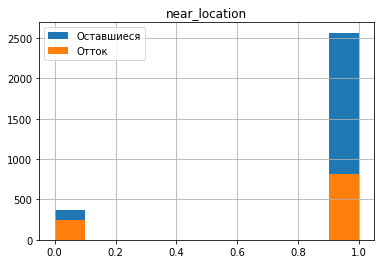

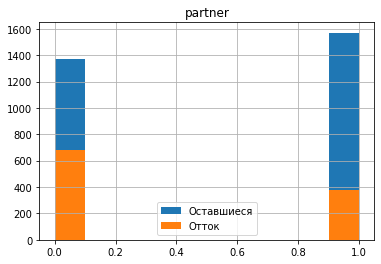

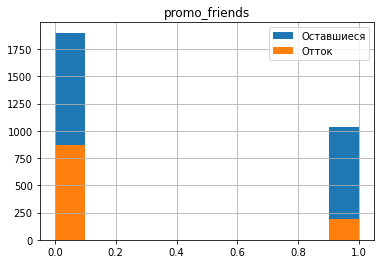

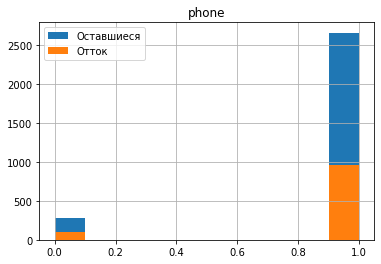

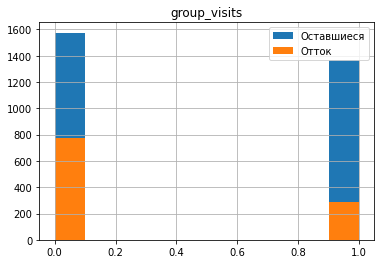

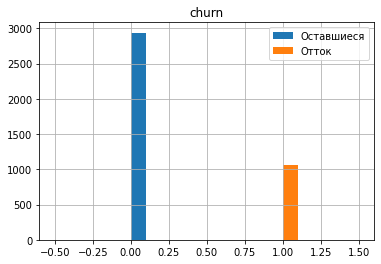

In [12]:
for column in gym_churn.columns:
    if column not in ['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'lifetime', 'age', 'contract_period', 'month_to_end_contract']:
      gym_churn.groupby('churn')[column].hist()
      plt.title(column)
      plt.legend(['Оставшиеся', 'Отток'])
      plt.show()

Графики отражают картину, которую мы получили при просмотре средних значений.

### Матрица корреляций

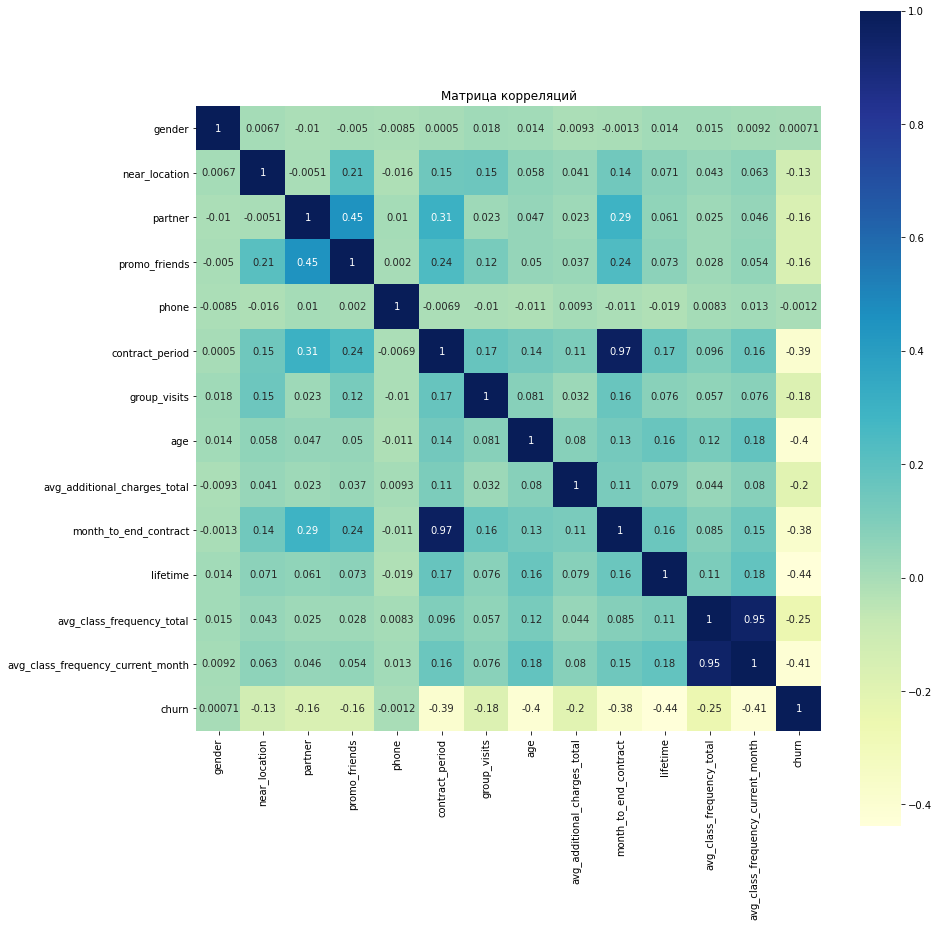

In [13]:
plt.figure(figsize=(14,15))
sns.heatmap(data = gym_churn.corr(), annot=True, square=True, cmap="YlGnBu")
plt.title('Матрица корреляций')
plt.show()

Исходя из тепловой карты, видно, что сильно коррелируют такие признаки как мonth_to_end_contract ( срок до окончания текущего действующего абонемента (в месяцах)) и сontract_period (длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год), а так же аvg_class_frequency_current_month ( средняя частота посещений в неделю за предыдущий месяц) и аvg_class_frequency_total (средняя частота посещений в неделю за все время с начала действия абонемента), что логично, поскольку показатели взаимосвязанны между собой. Также видна некоторая зависимость между promo_friends и partner. Вероятно, сотрудники компаний-партнеров клуба чаще остальных приглашают своих друзей и знакомых.

Явной зависимости факта оттока от признаков не обнаружено.

## Шаг 3. Построение модели прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:

Разделяем данные на признаки (матрица X) и целевую переменную (y):

In [14]:
X = gym_churn.drop('churn', axis = 1)

In [15]:
y = gym_churn['churn']

Разбьем данные на обучающую и валидационную выборку функцией train_test_split():

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

### Логистическая регрессия

Зададим алгоритм для нашей модели:

In [17]:
log_reg_model = LogisticRegression(random_state = 0) 

Обучим модель:

In [18]:
log_reg_model.fit(X_train, y_train)

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [19]:
predictions = log_reg_model.predict(X_test)
probabilities =  log_reg_model.predict_proba(X_test)[:,1]

In [20]:
print('Метрики для модели логистической регрессии:')
print()
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test,predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test,predictions)))
print('F1: {:.2f}'.format(f1_score(y_test,predictions)))

Метрики для модели логистической регрессии:

Accuracy: 0.91
Precision: 0.83
Recall: 0.81
F1: 0.82


### Случайный лес

Зададим алгоритм для нашей модели:

In [21]:
random_forest_model = RandomForestClassifier(n_estimators = 100, random_state = 0)

Обучим модель случайного леса:

In [22]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [23]:
random_forest_predictions = random_forest_model.predict(X_test)# Ваш код здесь
random_forest_probabilities = random_forest_model.predict_proba(X_test)[:, 1]

In [24]:
print('Метрики для модели случайного леса:')
print()
print('Accuracy: {:.2f}'.format(accuracy_score(y_test,random_forest_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test,random_forest_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test,random_forest_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test,random_forest_predictions)))

Метрики для модели случайного леса:

Accuracy: 0.92
Precision: 0.84
Recall: 0.82
F1: 0.83


В целом, различия в моделях не критичны, но модель логистической регрессии регресси показала себя немного лучше, чем модель случайного леса - доля правильных прогнозов и полнота чуть выше в модели логистической регрессии. Возможно, при изменении таких параметров, как количество деревьев и глубины дерева, показатели в модели случайного леса могут улучшиться, но обе модели уже на данный момент показывают неплохие результаты.

Поскольку мы сделали выбор в пользу логистической регрессии - оценим степень воздействия признаков на целевую переменную:

**Важность признаков в логистической регрессии:**

Для начала посмотрим на знак перед коэффициентами - это обозначение напрявления влиляния признака на целевую переменную.

In [25]:
log_reg_coef = pd.DataFrame({'feature' : X_train.columns, 'coef' : log_reg_model.coef_[0]})
log_reg_coef

,feature,coef
0,gender,0.063792
1,near_location,-0.156738
2,partner,-0.079159
3,promo_friends,-0.692443
4,phone,1.157229
5,contract_period,-0.050411
6,group_visits,-0.373360
7,age,-0.103244
8,avg_additional_charges_total,-0.004296
9,month_to_end_contract,-0.234766


Теперь оценим важность влияния признака. Будем смотреть на коэффициенты по модулю:

In [26]:
log_reg_coef['coef'] = log_reg_coef['coef'].abs()
log_reg_coef.sort_values(by = 'coef', ascending = False)

,feature,coef
12,avg_class_frequency_current_month,5.213690
11,avg_class_frequency_total,4.565715
4,phone,1.157229
10,lifetime,1.014122
3,promo_friends,0.692443
6,group_visits,0.373360
9,month_to_end_contract,0.234766
1,near_location,0.156738
7,age,0.103244
2,partner,0.079159


Можно сделать **следующий вывод:**:

Больше всего на отток влияет средняя частота посещений в неделю за предыдущий месяц - чем чаще человек посещает клуб в последнее время, тем ниже вероятность оттока (поскольку коэффициент отрицательный). Далее по степени важности идут такие показатели как средняя частота посещений в неделю за все время с начала действия абонемента и время с момента первого обращения в фитнес-центр (в месяцах), соответственно. 

## Шаг 4. Кластеризация клиентов

Для начала стандартизируем данные:

In [27]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(X)

Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму:

In [28]:
linked = linkage(x_sc, method = 'ward') 

В переменной linked сохранена таблица «связок» между объектами. Её можно визуализировать как дендрограмму:

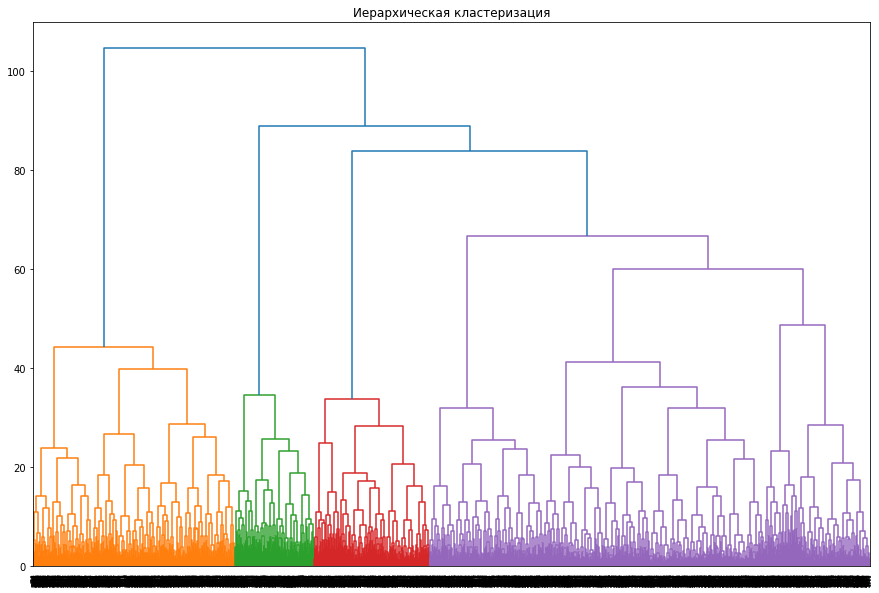

In [29]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация')
plt.show() 

Исходя из дендограммы, можно предположить, что в нашей выборке 4 основных кластера (4 разных цвета на графике). Однако договоримся за число кластеров принять n=5 согласно условию тестового задания. Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов:

In [30]:
km = KMeans(n_clusters = 5, random_state = 0) # задаём число кластеров, равное 5
labels = km.fit_predict(x_sc) # применяем алгоритм к данным и формируем вектор кластеров

# сохраняем метки кластера в поле нашего датасета
gym_churn['cluster_km'] = labels

**Cредние значения признаков для кластеров**

In [31]:
# выводим статистику по средним значениям наших признаков по кластеру
gym_churn.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
1,0.480787,0.812559,0.000000,0.086223,1.000000,1.866917,0.325211,28.145267,131.369042,1.791003,2.345829,1.325865,1.086883,0.550141
2,0.559567,0.858002,0.338147,0.197353,0.998797,2.730445,0.448857,30.196149,164.579011,2.519856,5.010830,2.928140,2.934140,0.048135
3,0.509603,0.750320,1.000000,0.451985,1.000000,2.554417,0.303457,28.499360,129.812508,2.370038,2.832266,1.355379,1.176172,0.395647
4,0.495726,0.943376,0.752137,0.541667,1.000000,11.352564,0.564103,29.993590,164.563799,10.376068,4.817308,2.028169,2.020129,0.023504


Самая высокая доля оттока у третьего кластера (51%), у второго и первого кластеров - 44% и 27% соотвественно, минимальные значения у четвертого и нулевого кластеров - 7% и 3% соответственно. Последние два кластера наиболее надежные.

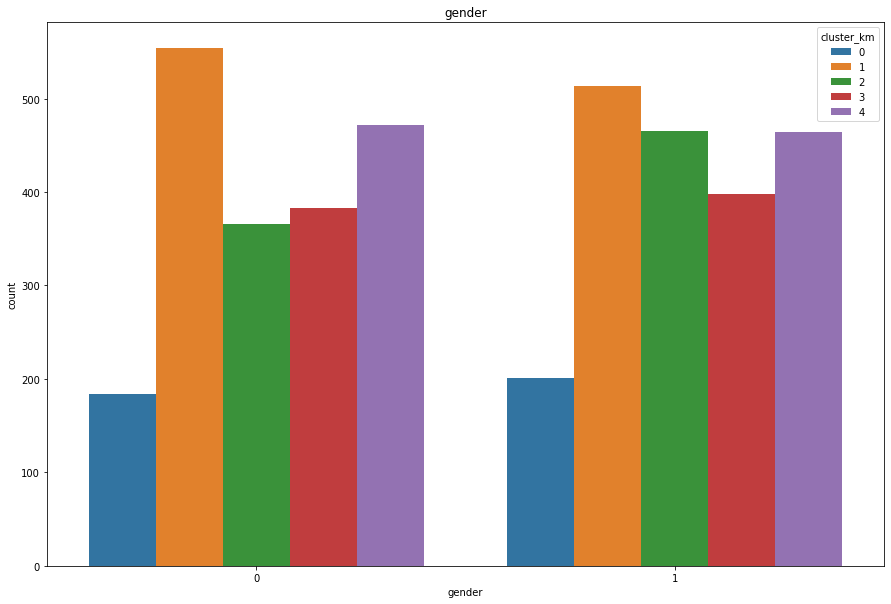

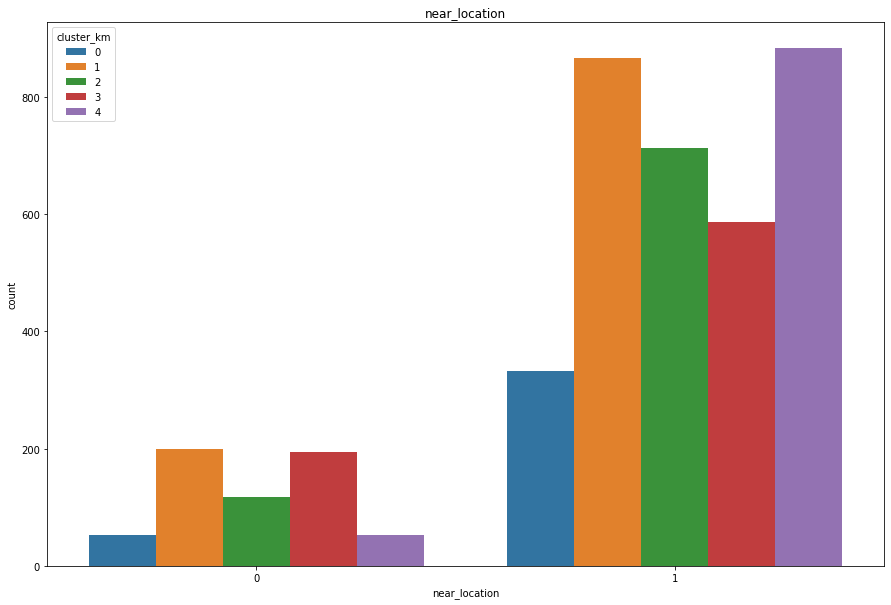

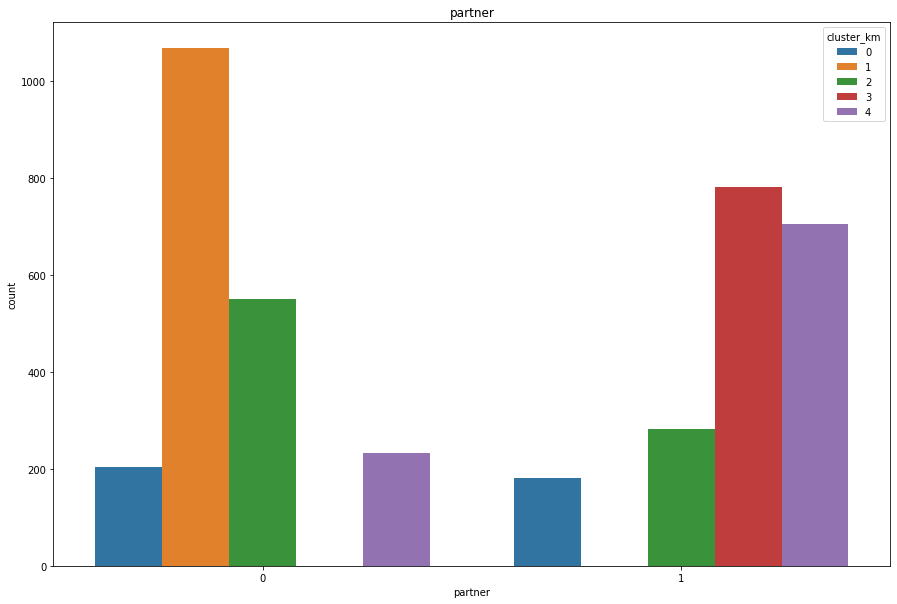

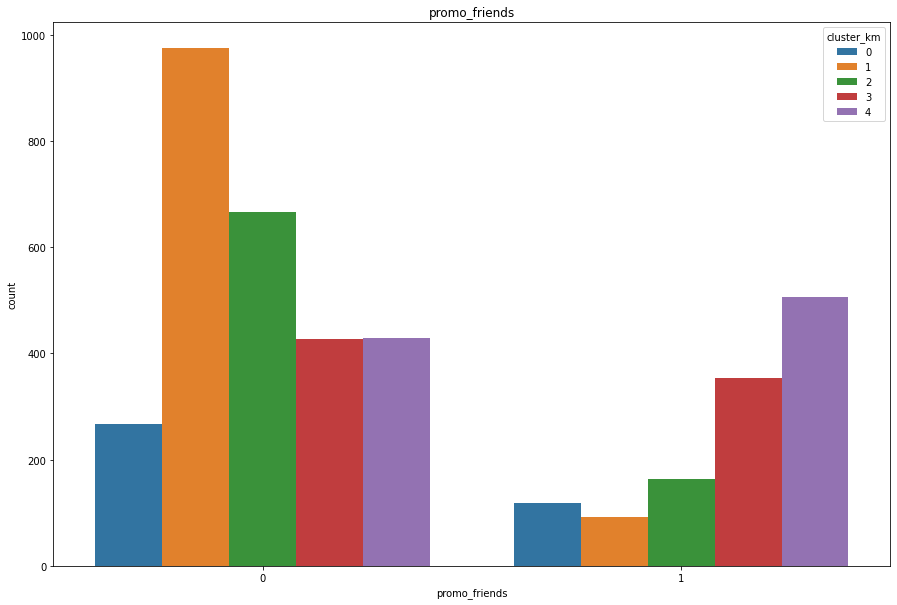

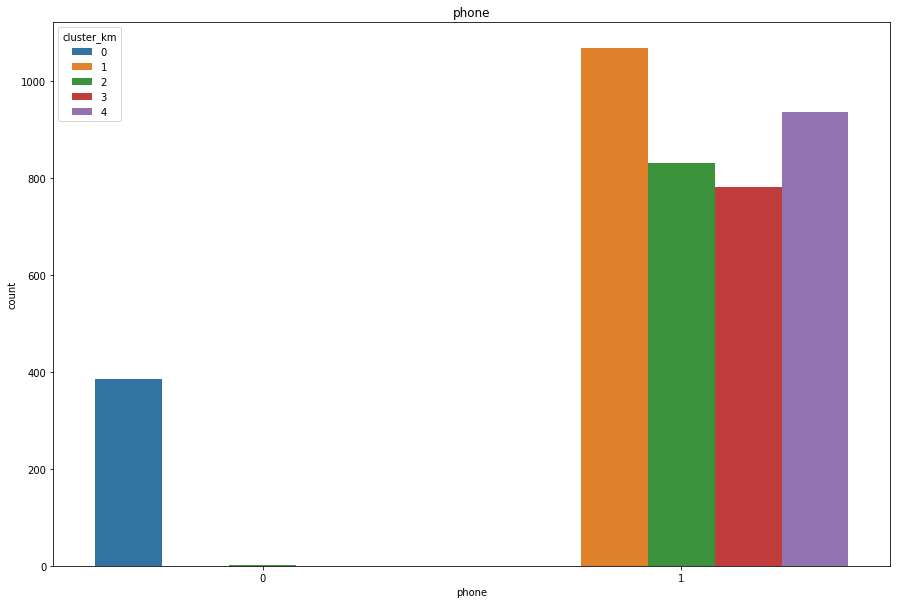

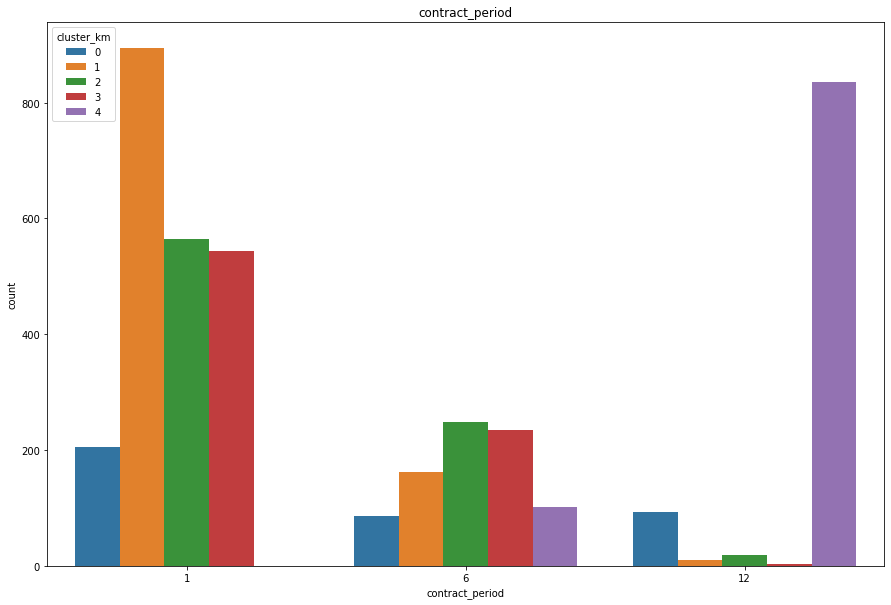

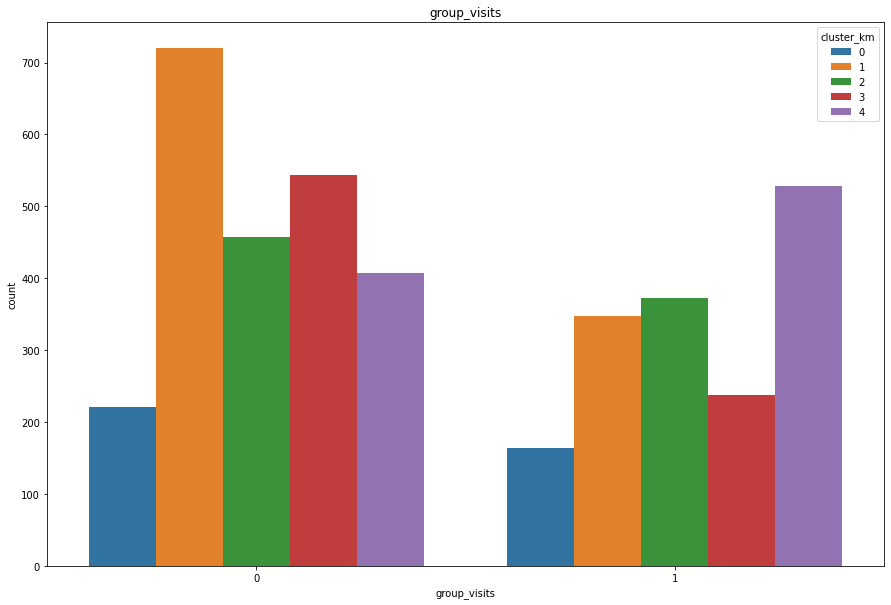

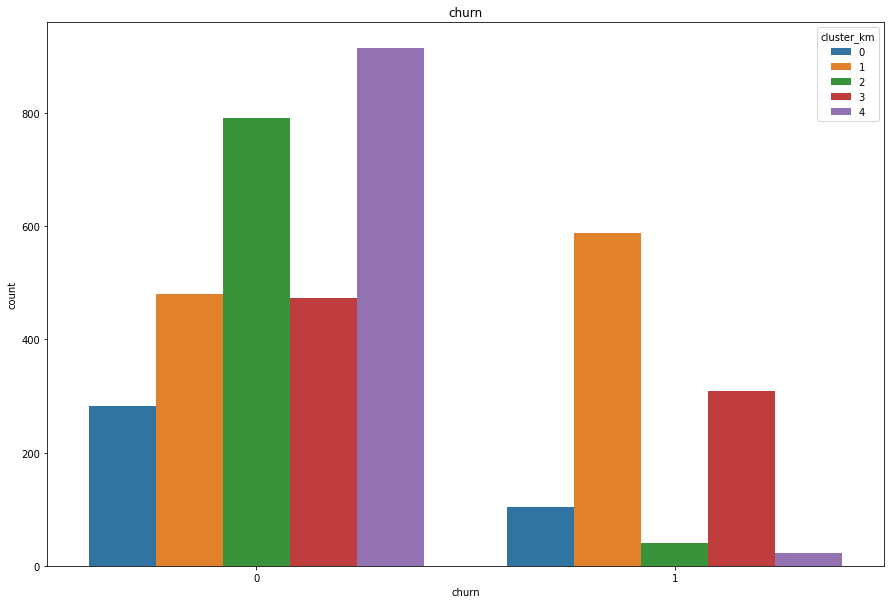

In [32]:
for column in ['gender', 'near_location','partner','promo_friends', 'phone','contract_period', 'group_visits', 'churn']:
    plt.figure(figsize=(15, 10))
    sns.countplot(x = gym_churn[column], hue='cluster_km', data=gym_churn)
    plt.title(column)
    plt.show()

c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\users\asus\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt 

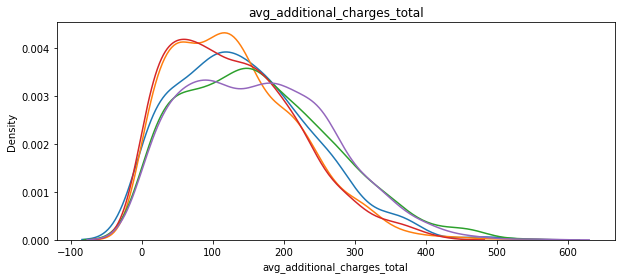

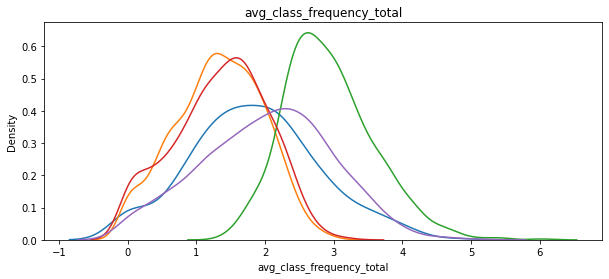

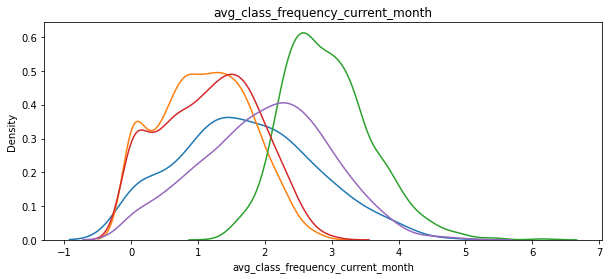

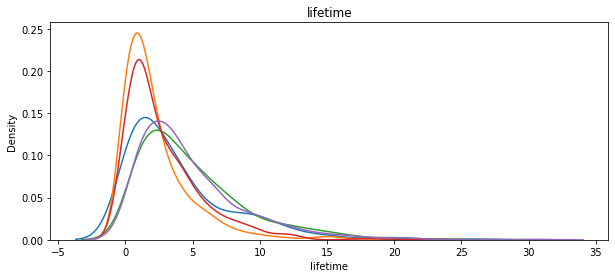

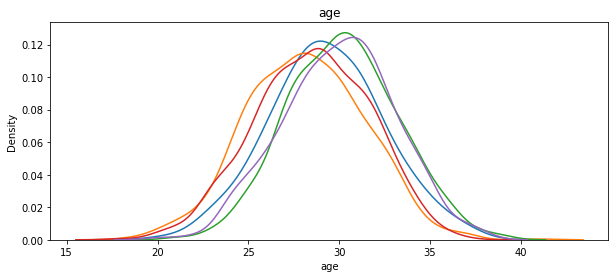

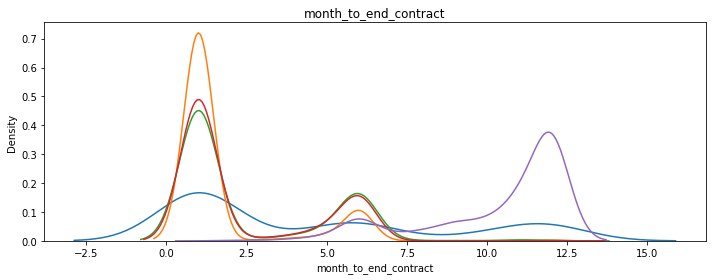

In [33]:
for column in ['avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month', 'lifetime', 'age', 'month_to_end_contract']: 
  plt.figure(figsize=(10,4)) 
  for i in range(0,5):
        sns.distplot(gym_churn.query('cluster_km == @i')[column], hist=False, kde_kws={'label':'Кластер'+ str(i)})
  plt.title(column)
plt.tight_layout()

На основе статистики по средним значениям признаков по кластерам и графикам распределений можно выделить ключевые характеристики для каждого кластера:


Отток - 26%
Живут или работают недалеко от фитнес-центра
Нет мобильного номера
В среднем 4.5 месяцев контракты

**Кластер 0:**

- Отток - 3% (Самый надежный кластер)

- Фитнес-центр находится близко от дома или места работы клиентов этого кластера (такая ситуация со всеми кластерами, кроме второго)

- Этот кластер лидирует по количеству сотрудников компаний- партнеров и по посещаемости групповых занятий

- В основном все люди, пришедшии по промо акции сосредоточены в этом кластере

- Средняя длительность текущего действующего абонемента - почти 11 месяцев


**Кластер 1:**

- Отток - 27%

- Единственный кластер, который не делится своими контактами

- Средняя длительность текущего действующего абонемента - 4.8 месяцев

**Кластер 2:**

- Отток - 44%

- Не любят групповые тренировки

- Почти никто из предстваителей этого кластера не использовал промо-код от знакомого при оплате первого абонемента

- Средняя длительность текущего действующего абонемента - 2.4 месяца

**Кластер 3:**

- Отток - 51% - (самый ненадежный кластер)

- Аутсайдеры по количеству суммарных посещений и посещений за последний месяц

- Меньше всего приносят денег клубу за дополнительные услуги

- Средняя длительность текущего действующего абонемента - 1.9 месяцев

**Кластер 4:**

- Отток - 7%

- Лидеры по количеству посещений в неделю

- Средняя длительность текущего действующего абонемента - 2.7 месяцев

## Шаг 5. Выводы и базовые рекомендации по работе с клиентами

**Вывод на основе описательных статистик:**

- Распределение по полу приблизительно одинаковое


- Большинство пользователей (85%) живут или работают в районах, где находится фитнес-центр


- Почти половина пользователей являются сотрудниками компании-партнёра клуба


- Приблизительно 31% клиентов использовали промо-код от знакомого при оплате первого абонемента


- В 90% случаев известен контактный телефон клиента


- Средний возраст клиента - 29 лет


- Средние выручка от клиента на дополнительные услуги - 146 у.е. ( кафе, спорт-товары, косметический и массажный салон)


- Средний срок до окончания текущего действующего абонемента - 4.3 месяца


- Среднее время с момента первого обращения в фитнес-центр - 3.7 месяцев


- Средняя частота посещений в неделю за все время с начала действия абонемента - около 2 раз (1.88)


- Средняя частота посещений в неделю за предыдущий месяц - около 2 раз (1.77)


- Доля оттока - приблизительно 27%

**Вывод на основе средних значений в двух группах (попавших в отток и тех, кто остались):**

- Распределение по полу приблизительно одинаковое, что среди тех, кто ушел в отток, что среди оставшихся


- Доля клиентов,  живущих или работающих в районах, где находится фитнес-центр, ниже среди тех, кто попал в отток, что также логично, поскольку из-за дополнительных издержек человек может сделать выбор в пользу какого-нибудь другого варианта


- Среди попавших в отток доля людей, являющихся сотрудниками компании-партнёра клуба, существенно ниже


- Среди попавших в отток доля людей, использовавших промо-код от знакомого при оплате первого абонемента, существенно ниже (Вероятно, что люди могут посещать зал вместе, а таким образом меньше вероятность того, что они уйдут в отток)

- Наличие мобильного номера клиента не отличается в группах


- Длительность текущего действующего абонемента среди попавших в отток существенно ниже (1.7 месяца против 5.7). Это логично, так как человек в ближайшее время может понять, удобен ли ему по всем параментам  клуб. К тому же есть много акций на первый месяц занятий - люди воспользуются выгодой, но остаться в клубе не планируют

- У групп есть разница в среднем возрасте клиентов - попавшие в отток моложе

- Суммарная выручка от дополнительных услуг фитнес-центра ниже среди тех, кто попал в отток


- Срок до окончания текущего действующего абонемента существенно ниже среди тех, кто попал в отток, что логично, потому что обидно терять слишком много занятий, на которые были потрачены деньги


- Время с момента первого обращения в фитнес-центр (в месяцах) для действующей группы - 4.7 месяцев, а для группы оттока - 1.7.


- Средняя частота посещений в неделю за все время с начала действия абонемента для тех, кто попал в отток - 1.47 раз, а для тех, кто не попал - 2.02


- Средняя частота посещений в неделю за предыдущий месяц почти в два раза ниже у группы, попавшей в отток. На мой взгляд, наиболее важное наблюдение.

**Выбор и интерпретация модели для прогнозирования вероятности оттока по каждому клиенту:**

В целом, различия в моделях не критичны, но модель логистической регрессии регресси показала себя немного лучше, чем модель случайного леса - доля правильных прогнозов и полнота чуть выше в модели логистической регрессии. Возможно, при изменении таких параметров, как количество деревьев и глубины дерева, показатели в модели случайного леса могут улучшиться, но обе модели уже на данный момент показывают неплохие результаты.

Больше всего на отток влияет средняя частота посещений в неделю за предыдущий месяц - чем чаще человек посещает клуб в последнее время, тем ниже вероятность оттока (поскольку коэффициент отрицательный). Далее по степени важности идут такие показатели как средняя частота посещений в неделю за все время с начала действия абонемента и время с момента первого обращения в фитнес-центр (в месяцах), соответственно.

**Кластеризация клиентов:**
    
Согласно условию задания, мы выделили 5 кластеров с характерными чертами:

**Кластер 0:**

- Отток - 3% (**Самый надежный кластер**)

- Фитнес-центр находится близко от дома или места работы клиентов этого кластера (такая ситуация со всеми кластерами, кроме второго)

- Этот кластер лидирует по количеству сотрудников компаний- партнеров и по посещаемости групповых занятий

- В основном все люди, пришедшие по промо акции сосредоточены в этом кластере

- Средняя длительность текущего действующего абонемента - почти 11 месяцев


**Кластер 1:**

- Отток - 27%

- Единственный кластер, который не делится своими контактами

- Средняя длительность текущего действующего абонемента - 4.8 месяцев

**Кластер 2:**

- Отток - 44%

- Не любят групповые тренировки

- Почти никто из предстваителей этого кластера не использовал промо-код от знакомого при оплате первого абонемента

- Средняя длительность текущего действующего абонемента - 2.4 месяца

**Кластер 3:**

- Отток - 51% - (**самый ненадежный кластер**)

- Аутсайдеры по количеству суммарных посещений и посещений за последний месяц

- Меньше всего приносят денег клубу за дополнительные услуги

- Средняя длительность текущего действующего абонемента - 1.9 месяцев

**Кластер 4:**

- Отток - 7%

- Лидеры по количеству посещений в неделю

- Средняя длительность текущего действующего абонемента - 2.7 месяцев

**Рекомендации по работе с клиентами:**

Здесь стоит обратить внимание на отличительные особенности самого надежного и самого ненадежного кластера, а именно нулевого и третьего, соответственно.

- Наиболее очевидное наблюдение - чем дольше срок абонемента, тем ниже отток. Соответственно, можно сделать дополнительную скидку на долгосрочные абонементы.


- Клиенты, не уходяшие в отток в большинстве своем приходят по по промо-акции, поэтому необходимо дополнительно простимулировать их делиться промо-кодами со своими знакомыми


- В целом, полагаю, что основная идея заключается в том, чтобы уделить внимание самому надежному кластеру и стараться перенести секрет успеха этого кластера на все остальные)